In [23]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import warnings

### 正则项package

In [24]:
import sklearn
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model.coordinate_descent import ConvergenceWarning

### 中文乱码设置

In [25]:
mpl.rcParams['font.sans-serif'] = [u'simHei']
mpl.rcParams['axes.unicode_minus'] = False

### 忽略特定警告

In [26]:
warnings.filterwarnings(action='ignore',category=ConvergenceWarning)

### 伪造数据

In [27]:
#输出格式设置
np.random.seed(100)
np.set_printoptions(linewidth=1000,suppress=True)

In [28]:
N = 10
x = np.linspace(0,6,10)+np.random.randn(N)
y = 1.8*x**3 + x**2 - 14*x -7 + np.random.randn(N)

x.shape = -1,1
y.shape = -1,1

### 管道模型

In [29]:
#管道对象声明
models = [
    Pipeline([
        ('Ploy',PolynomialFeatures(include_bias=True)),
        ('Linear',LinearRegression(fit_intercept=False))
    ]),
    Pipeline([
        ('Ploy',PolynomialFeatures(include_bias=True)),
        ('Linear',RidgeCV(alphas = np.logspace(-3,2,50),fit_intercept=False))
    ]),
    Pipeline([
        ('Ploy',PolynomialFeatures(include_bias=True)),
        ('Linear',LassoCV(alphas = np.logspace(0,1,10),fit_intercept=False))
    ]),
    Pipeline([
        ('Ploy',PolynomialFeatures(include_bias=True)),
        ('Linear',ElasticNetCV(alphas = np.logspace(0,1,10),l1_ratio=[0.1,0.5,0.7,0.9,0.95,1],
                               fit_intercept=False))
    ])
]

### 设置可视化

In [30]:
plt.figure(facecolor='w')
#高次设置
degree = np.arange(1,N,4)

<Figure size 432x288 with 0 Axes>

In [31]:
dm = degree.size
colors = []
for c in np.linspace(16711680,255,dm):
    colors.append('#%06x'% int(c))

### 回归模型不同degree对比

ValueError: Invalid parameter Poly for estimator Pipeline(memory=None,
     steps=[('Ploy', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('Linear', LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
         normalize=False))]). Check the list of available parameters with `estimator.get_params().keys()`.

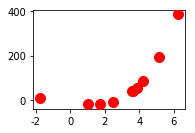

In [32]:
model = models[0]
for i,d in enumerate(degree):
    plt.subplot(int(np.ceil(dm/2.0)),2,i+1)
    #真实数据绘制
    plt.plot(x,y,'ro',ms=10,zorder=N)
    
    #利用管道模型
#     model.set_params(Poly__degree=d)
#     model.fit(x,y.ravel())
    model.set_params(Poly__degree=d)
    model.fit(x,y.ravel())
    
    lin = model.set_params()['Linear']
    #拼凑输出字符串
    output = u'%d阶，系数为：'%(d)
    print(output,lin.coef_.ravel())
    
    #绘制拟合曲线
    x_hat = np.linspace(x.min(),x.max(),num=100)
    x_hat.shape = -1,1
    y_hat = model.predict(x_hat)
    
    #拟合分数
    s = model.score(x,y)
    
    #可视化预测数据
    z = N-1 if (d==5) else 0
    label = u'%d阶,R2 = %.3f'% (d,s)
    plt.plot(x_hat,y_hat,color = colors[i],lw=2,alpha = 0.75,label=label,zorder=z)
    
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.xlabel('X',fontsize=16)
    plt.ylabel('Y',fontsize=16)
    
plt.tight_layout(1,rect=(0,0,1,0.95))
plt.suptitle(u'线性回归',fontsize=22)
plt.show()